# Resumo

A ideia do projeto é **classificar o gênero de uma música** com base em várias métricas que o próprio *Spotify* disponibiliza para o público. É de conhecimento prévio do grupo que este tipo de problema tende a ter uma baixa acurácia e dificilmente o modelo atinge um resultado satisfatório. No entanto, pensando em trazer algo mais diverso e diferente para trabalhar, optamos por encarar o desafio.


# Descrição do problema

A classificação de gênero de música é um desafio complexo devido à diversidade musical e à sobreposição de características entre diferentes gêneros. Com a crescente e imparável indústria da música ganhando cada vez mais espaço em todas as plataformas, é do interesse dos aplicativos de streaming musical poder classificar o gênero de uma música sem interferência manual.

### Desafios
- **Alta Diversidade Musical**: A música abrange uma ampla gama de estilos e subgêneros, tornando a classificação precisa desafiadora devido à sobreposição de características entre gêneros.
- **Baixa Acurácia Esperada**: É importante ter em mente que a classificação de gênero de música tende a ter uma baixa acurácia devido à subjetividade e à evolução dos gêneros ao longo do tempo.
- **Escolha de Algoritmos**: Será necessário explorar e escolher os melhores algoritmos de aprendizado de máquina, como árvores de decisão, redes neurais ou algoritmos de classificação, para lidar com a complexidade do problema.


# Descrição da Metodologia

### Data Preparing
- **Tratando Vazios**: Como o dataset disponibilizado é limitado a 17996 linhas, optamos por tentar deleta-las o minimo possivel, com isso em mente, decidimos substituir os valores vazios pela média da coluna **por genero classificado**, ou seja, uma media para cada classe.
- **Removendo Categoricos**: Felizmente, grande parte dos dados são numericos, as colunas retiradas a principio serão nome do Artista e nome da musica, iremos considerar que o artista não influencia no gênero.
- **Normalização**: Utilizamos o StandardScaler para normalizar os dados, não será necessário aplicar nenhum tipo de Hot/Label encode visto que estamos utilizando apenas dados numericos.

### Modeling
Utilizaremos diversos modelos de classificação diferentes,a ideia é testar a acuracia de todos para decidir qual melhor se encaixa para nosso problema, os modelos testados serão:

- **DecisionTree**
- **RandomForest**
- **KNeighbors**
- **LogisticRegression**
- **AdaBoost**
- **GradientBoosting**
- **GaussianNB**
- **SVC**
- **MLP**

# Codigo

##Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/Andre647/Spotify_Classification/main/data/train_music.csv')
train.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


## Visualizando o dado

In [3]:
mapeamento_classes = {
    0: 'Acoustic Folk',
    1: 'Alt',
    2: 'Blues',
    3: 'Bollywood',
    4: 'Country',
    5: 'HipHop',
    6: 'Indie',
    7: 'Instrumental',
    8: 'Metal',
    9: 'Pop',
    10: 'Rock'
}

In [4]:
train_label = train.copy()
train_label['Classes_name'] = train_label['Class'].map(mapeamento_classes)

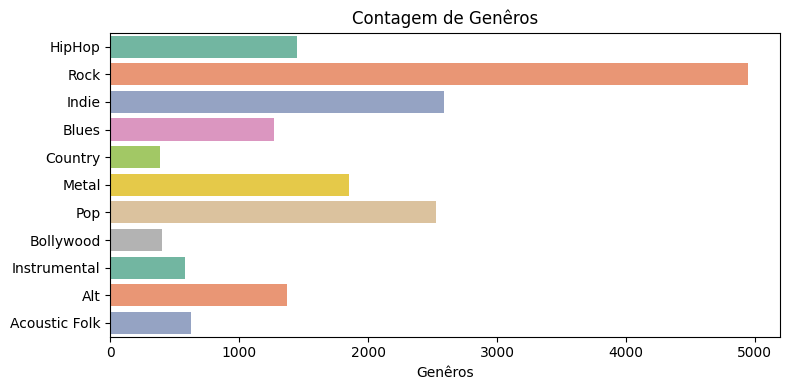

In [5]:
plt.figure(figsize=(8, 4))
sns.countplot(data=train_label, y='Classes_name', palette='Set2')  # Você pode escolher uma paleta de cores diferente

plt.xlabel('Genêros')
plt.ylabel('')
plt.title('Contagem de Genêros')


plt.tight_layout()
plt.show()

In [6]:
train.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


## Tratando Vazios e removendo categoricos

In [7]:
train.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [8]:
popularity_means = train.groupby('Class')['Popularity'].mean()
train['Popularity'].fillna(train['Class'].map(popularity_means), inplace=True)

key_means = train.groupby('Class')['key'].mean()
train['key'].fillna(train['Class'].map(key_means), inplace=True)

instrumentalness_means = train.groupby('Class')['instrumentalness'].mean()
train['instrumentalness'].fillna(train['Class'].map(instrumentalness_means), inplace=True)

In [9]:
X = train.drop(columns = ['Class','Artist Name','Track Name'])
y = train['Class']

In [10]:
X.isnull().sum()

Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
dtype: int64

In [11]:
X.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.068779,0.0849,0.8990,134.071,234596.0,4
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4
3,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.068779,0.1220,0.5690,107.033,173968.0,4
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4


## Selecionando Features

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

selectk_ft = SelectKBest(score_func=f_classif, k=8).set_output(transform='pandas')
k_features = selectk_ft.fit_transform(X, y)

In [13]:
X = k_features
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,duration_in min/ms
0,0.854,0.564,-4.964,0.0485,0.017100,0.068779,0.8990,234596.0
1,0.382,0.814,-7.230,0.0406,0.001100,0.004010,0.5690,251733.0
2,0.434,0.614,-8.334,0.0525,0.486000,0.000196,0.7870,109667.0
3,0.853,0.597,-6.528,0.0555,0.021200,0.068779,0.5690,173968.0
4,0.167,0.975,-4.279,0.2160,0.000169,0.016100,0.0918,229960.0
...,...,...,...,...,...,...,...,...
17991,0.166,0.109,-17.100,0.0413,0.993000,0.824000,0.1770,193450.0
17992,0.638,0.223,-10.174,0.0329,0.858000,0.000016,0.3350,257067.0
17993,0.558,0.981,-4.683,0.0712,0.000030,0.000136,0.2620,216222.0
17994,0.215,0.805,-12.757,0.1340,0.001290,0.916000,0.3550,219693.0


## Normalização

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X = X_scaled
X.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,duration_in min/ms
0,1.867915,-0.419671,0.727743,-0.373407,-0.740387,-0.332574,1.718614,0.302284
1,-0.970946,0.642500,0.168104,-0.467934,-0.791896,-0.573759,0.344694,0.455312
2,-0.658190,-0.207237,-0.104553,-0.325545,0.769157,-0.587961,1.252314,-0.813293
3,1.861901,-0.279465,0.341479,-0.289648,-0.727188,-0.332574,0.344694,-0.239105
4,-2.264071,1.326539,0.896919,1.630811,-0.794893,-0.528739,-1.642078,0.260886


## Definindo/Treinando Modelo

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


base_estimators = [ DecisionTreeClassifier(criterion='log_loss'),
                    DecisionTreeClassifier(criterion='entropy'),
                    RandomForestClassifier(),
                    KNeighborsClassifier(100),
                    KNeighborsClassifier(1),
                    LogisticRegression(max_iter=10000),
                    AdaBoostClassifier(),
                    GradientBoostingClassifier(),
                    GaussianNB(),
                    SVC(),
                    MLPClassifier(max_iter=1000,hidden_layer_sizes=(64,128,64)),
                    ]

best_score = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state = 42)

for estimator in base_estimators:
  clf = estimator
  clf.fit(X_train, y_train)

  score = clf.score(X_test, y_test) # accuracy

  if score > best_score:
    best_score = score
    best_model = clf

    print('\n Best Model: ' , best_model, ' score = ', best_score)


 Best Model:  DecisionTreeClassifier(criterion='log_loss')  score =  0.46860529727727357

 Best Model:  DecisionTreeClassifier(criterion='entropy')  score =  0.475828857195777

 Best Model:  RandomForestClassifier()  score =  0.5664011854047045

 Best Model:  GradientBoostingClassifier()  score =  0.6162252268938693


In [16]:
best_model

GradientBoostingClassifier()

In [17]:
print(classification_report(y_test,best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78       187
           1       0.71      0.13      0.22       412
           2       0.52      0.36      0.43       382
           3       0.82      0.77      0.79       121
           4       0.82      0.75      0.78       116
           5       0.77      0.82      0.80       434
           6       0.48      0.41      0.44       776
           7       0.93      0.92      0.93       173
           8       0.65      0.62      0.63       556
           9       0.71      0.66      0.68       757
          10       0.54      0.75      0.62      1485

    accuracy                           0.62      5399
   macro avg       0.70      0.64      0.65      5399
weighted avg       0.63      0.62      0.60      5399



## Predicao de novos casos

In [18]:
test = pd.read_csv('https://raw.githubusercontent.com/Andre647/Spotify_Classification/main/data/test_music.csv')
test.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,David Bowie,Space Oddity - 2015 Remaster,73.0,0.310,0.403,NaN,-13.664,1,0.0326,0.07260,0.000093,0.1390,0.466,134.480,318027.000000,4
1,Crimson Sun,Essence of Creation,34.0,0.511,0.955,1.0,-5.059,1,0.1290,0.00040,0.000009,0.2630,0.291,151.937,220413.000000,4
2,P!nk,Raise Your Glass,78.0,0.700,0.709,7.0,-5.006,1,0.0839,0.00480,NaN,0.0289,0.625,122.019,202960.000000,4
3,Shawn Mendes,Wonder,80.0,0.333,0.637,1.0,-4.904,0,0.0581,0.13100,0.000018,0.1490,0.132,139.898,172693.000000,4
4,Backstreet Boys,Helpless When She Smiles - Radio Version,48.0,0.393,0.849,11.0,-4.114,1,0.0459,0.00421,NaN,0.1620,0.222,74.028,4.093117,4


In [19]:
test = test.dropna().reset_index(drop=True)
X_test = test[['danceability',	'energy',	'loudness',	'speechiness',	'acousticness',	'instrumentalness',	'valence',	'duration_in min/ms']]

In [20]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_test = X_test_scaled
X_test.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,duration_in min/ms
0,-0.195071,1.241565,0.704281,0.589814,-0.794150,-0.588659,-0.812730,0.175634
1,-1.265658,-0.109517,0.742561,-0.258538,-0.373705,-0.588624,-1.474710,-0.250491
2,0.917618,1.343534,0.635375,-0.421269,-0.787582,2.271139,1.980908,1.322616
3,-1.283702,-0.453661,-0.884985,-0.001280,-0.129036,-0.588528,0.082400,0.192297
4,-0.682248,1.186332,1.210821,0.138716,-0.794903,-0.588620,0.294733,-0.538857


In [21]:
X_test['predict'] = best_model.predict(X_test)

result = pd.concat([test[['Artist Name','Track Name']], X_test['predict']], axis=1)
result = result.reset_index(drop=True)

result['Genero'] = result['predict'].map(mapeamento_classes)
result

,Artist Name,Track Name,predict,Genero
0,Crimson Sun,Essence of Creation,8,Metal
1,Shawn Mendes,Wonder,10,Rock
2,Paul McCartney,Pretty Boys (feat. Khruangbin),6,Indie
3,The Flaming Lips,She Don't Use Jelly,10,Rock
4,The Vanities,Wasted All My Days,10,Rock
...,...,...,...,...
5058,Johnny Mafia,Kim Deal,10,Rock
5059,Friedberg,Yeah,6,Indie
5060,Elephant Tree,Echoes,10,Rock
5061,Shankar Mahadevan,Man Mohini,5,HipHop


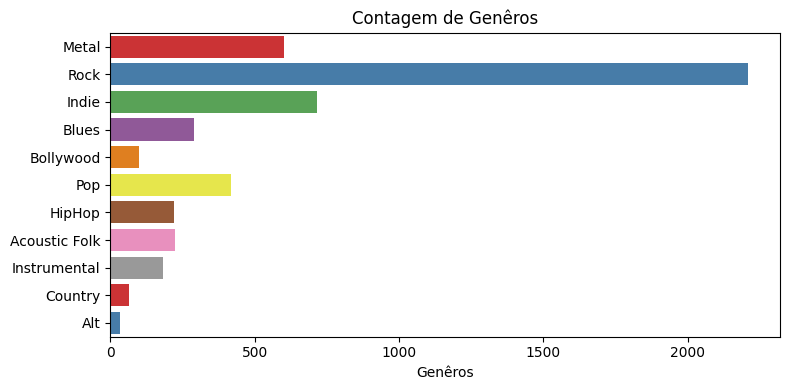

In [22]:
plt.figure(figsize=(8, 4))
sns.countplot(data=result, y='Genero', palette='Set1')  # Você pode escolher uma paleta de cores diferente

plt.xlabel('Genêros')
plt.ylabel('')
plt.title('Contagem de Genêros')


plt.tight_layout()
plt.show()


# Resultados obtidos

Obtivemos uma acuracia geral de 62%, é possivel verificar-lo através do classification report utilizando o modelo GradientBoostingClassifier, é possivel visualizar que Blues, Indie e Rock( 2,6,10 ) apresentaram uma acuracia de 50%, ja os outros generos apresentaram uma acuracia considerável.

Vale ressaltar que tinhamos feito o modelo anterior sem a media por classe para tratar dados vazios, e sim uma media geral, que resultou numa acuracia de 51%, ou seja, tratar os dados vazios por classe melhorou o nosso modelo em 10%.


 ****
          precision    recall  f1-score   support

           0       0.71      0.86      0.78       187
           1       0.71      0.13      0.22       412
           2       0.52      0.36      0.43       382
           3       0.82      0.77      0.79       121
           4       0.82      0.75      0.78       116
           5       0.77      0.82      0.80       434
           6       0.48      0.41      0.44       776
           7       0.93      0.92      0.93       173
           8       0.65      0.62      0.63       556
           9       0.71      0.66      0.68       757
          10       0.54      0.75      0.62      1485

      accuracy                           0.62    5399
      macro avg       0.70   0.64  0.65  5399
      weighted avg    0.63   0.62  0.60  5399



# Conclusão

Ja era de conhecimento do grupo que o modelo não teria uma acuracia muito alta, considerando que possuiam 11 generos possiveis, 62% foi um resultado bem satisfatório, fato é, para realizar um modelo que tenha uma precisão de mercado, que seja realmente pratico, seria necessário pegar variaveis externas, como historico do artista e opnião do próprio publico.  
  
Como dito anteriormente, genêro musical não é algo decisivo, é algo fluido que varia de nicho e publico, existem varios outros subgeneros que não estavam no dataset que poderiam influenciar o algoritmo.

# Referencias

https://www.kaggle.com/datasets/purumalgi/music-genre-classification